In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import mglearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#print("Current directory is:", os.getcwd())
data = pd.read_csv('asteroiddata.csv')
X_num = data.drop(['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha',
                  'orbit_id', 'equinox','class'], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(X_num)

X = imputer.transform(X_num)
X_clean = pd.DataFrame(X, columns=X_num.columns)
X_cat = data[['neo', 'pha', 'orbit_id', 'class']]
X_cat2 = X_cat.copy()
X_cat2 = X_cat2.dropna(inplace=False)

In [3]:
X_cat2 = X_cat2.rename(columns = {"class":"orbit_class"})
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

type_le = LabelEncoder()
type_labels = type_le.fit_transform(X_cat2['pha'])
X_cat2['pha_le'] = type_labels
X_cat3 = X_cat2.drop(['pha'], axis=1)

ytarget = X_cat3["pha_le"] #extracting our target value before we add dummie variables

X_cat4 = X_cat3.drop(['pha_le', 'orbit_id'], axis=1)
#print(X_cat4.head) prepping data for dummie variables and dropping 'orbit_id' because we'll have too many dummies

In [4]:
X_cat4dummies = pd.get_dummies(X_cat4, prefix="dmy", prefix_sep="*")
datacleaned = pd.concat([ytarget, X_clean, X_cat4dummies], axis=1)
datacleaned2 = datacleaned.dropna(inplace=False) 

In [5]:
display(datacleaned2)

,pha_le,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,dmy*AST,dmy*ATE,dmy*CEN,dmy*IEO,dmy*IMB,dmy*MBA,dmy*MCA,dmy*OMB,dmy*TJN,dmy*TNO
0,0.0,2000001.0,3.400,939.400,0.0900,0.200,2458600.5,58600.0,20190427.0,0.076009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2000002.0,4.200,545.000,0.1010,18.000,2459000.5,59000.0,20200531.0,0.229972,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2000003.0,5.330,246.596,0.2140,10.594,2459000.5,59000.0,20200531.0,0.256936,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2000004.0,3.000,525.400,0.4228,0.200,2458600.5,58600.0,20190427.0,0.088721,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2000005.0,6.900,106.699,0.2740,3.140,2459000.5,59000.0,20200531.0,0.190913,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,0.0,3246801.0,17.135,3.972,0.0790,0.332,2437203.5,37203.0,19600926.0,0.185919,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
958520,0.0,3246834.0,18.500,3.972,0.0790,0.332,2459000.5,59000.0,20200531.0,0.282920,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
958521,1.0,3013075.0,20.400,3.972,0.0790,0.332,2459000.5,59000.0,20200531.0,0.662446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958522,0.0,3246457.0,18.071,3.972,0.0790,0.332,2441956.5,41956.0,19731001.0,0.202053,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
features = datacleaned2.loc[:,'spkid':'dmy*TNO']
X = features.values
y = datacleaned2['pha_le'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

X.shape: (938599, 49) y.shape: (938599,)


## Scaling data

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[1.02042433e-01 9.24040425e-02 8.25239978e-02 6.57768414e-02
 6.31439842e-02 6.09795597e-02 4.26497436e-02 3.64501063e-02
 2.98041253e-02 2.86047606e-02 2.65243124e-02 2.35177980e-02
 2.32079166e-02 2.31426361e-02 2.20713201e-02 2.14502746e-02
 2.06924412e-02 2.06178506e-02 2.04285749e-02 2.04108643e-02
 2.03468416e-02 2.01138356e-02 1.94507141e-02 1.80244866e-02
 1.76085993e-02 1.65760774e-02 1.40655383e-02 1.34097594e-02
 1.07161869e-02 8.24364676e-03 5.79113773e-03 3.96291044e-03
 2.39291701e-03 1.45602690e-03 8.15071791e-04 5.04627268e-04
 3.46968701e-05 2.93745941e-05 1.04695516e-05 3.05194683e-06
 4.46925223e-07 1.37967552e-11 2.01243215e-32 1.12105356e-32
 7.96020315e-33 5.85134442e-34 5.85134442e-34 5.85134442e-34
 1.41241246e-34]


In [9]:
# keep the first two principal components of the data
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.10204243 0.09240404 0.082524   0.06577684 0.06314398 0.06097956
 0.04264974 0.03645011 0.02980413 0.02860476 0.02652431 0.0235178
 0.02320792 0.02314264 0.02207132 0.02145027 0.02069244 0.02061785
 0.02042857 0.02041086 0.02034684 0.02011384 0.01945071 0.01802449
 0.0176086  0.01657608 0.01406554]


In [10]:
# We only need 27 features to capture 95% of the variance 

## Splitting scaled X values to prepare for logistic regression

In [11]:
split = StratifiedShuffleSplit(n_splits=10,test_size=0.20,
                              random_state=42)

for train_index, test_index in split.split(X_scaled, y):
    X_train = X_scaled[train_index]
    X_test = X_scaled[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter=2000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print(classification_report(y_test, logreg.predict(X_test), target_names=["0.0", "1.0"]))

scores = cross_val_score(logreg, X_test, y_test, cv=split)
print("Cross-validation scores:\n{}".format(scores))

Training set score: 0.998
Test set score: 0.998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.71      0.45      0.55       413

    accuracy                           1.00    187720
   macro avg       0.86      0.72      0.78    187720
weighted avg       1.00      1.00      1.00    187720

Cross-validation scores:
[0.99824206 0.99786917 0.99778926 0.99792244 0.99792244 0.99808225
 0.99800234 0.99794907 0.99810889 0.99797571]


In [13]:
# transform data onto the first two principal components
X2_pca2 = pca2.transform(X_scaled)

for train_index, test_index in split.split(X_scaled, y):
    X2_train = X2_pca2[train_index]
    X2_test = X2_pca2[test_index]
    y2_train = y[train_index]
    y2_test = y[test_index]
    
logregpca = LogisticRegression(max_iter=2000).fit(X2_train, y2_train)

print("Accuracy on training set: {:.3f}".format(logregpca.score(X2_train, y2_train)))
print("Accuracy on test set: {:.3f}".format(logregpca.score(X2_test, y2_test)))
print(classification_report(y_test, logregpca.predict(X2_test), target_names=["0.0", "1.0"]))

scoreslogregpca = cross_val_score(logregpca, X2_test, y2_test, cv=split)
print("Cross-validation scores:\n{}".format(scoreslogregpca))

Accuracy on training set: 0.998
Accuracy on test set: 0.998
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187307
         1.0       0.33      0.06      0.10       413

    accuracy                           1.00    187720
   macro avg       0.66      0.53      0.55    187720
weighted avg       1.00      1.00      1.00    187720

Cross-validation scores:
[0.99770935 0.99765608 0.99765608 0.99760281 0.99784253 0.99765608
 0.99768272 0.99784253 0.99770935 0.99757618]


## Since the best machine learning algorthim were decision trees, with a near perfect score of  99.98% all across the board, I chose to run PCA with logistic regression using scaled data. Performance was lowered but not by much. Logistic regression with transformed data is still 99.8% accurate even with 10 fold stratified shuffled split features. 

## Performance was not improved by much, we can see that in the classification report that precision, recall, and the F1 scores are better when we train using a scaled version of our meteor features

# Applying KNN with and without pca

Text(0, 0.5, 'Feature 1')

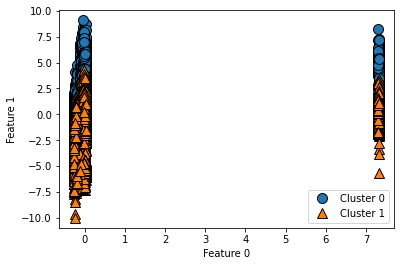

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

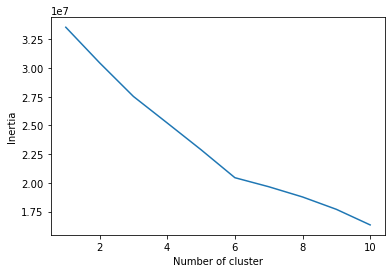

In [15]:
inertiaVals = {}

for k in range(1, 11):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [16]:
# testing on KNN with scaled PCA data:

Text(0, 0.5, 'Feature 1')

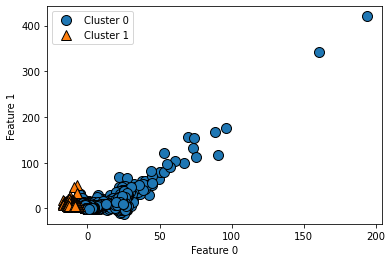

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X2_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X2_train[:, 0], X2_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

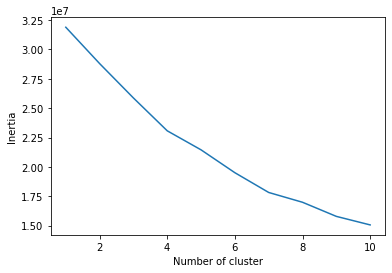

In [18]:
inertiaVals = {}

for k in range(1, 11):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X2_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [19]:
# Agglomarative Clustering:

In [20]:
#from sklearn.cluster import AgglomerativeClustering
#
#agg = AgglomerativeClustering(n_clusters=2)
#assignment = agg.fit_predict(X_train)
#
#mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
#plt.legend(["Cluster 0", "Cluster 1"], loc="best")
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")

In [21]:
#Now with scaled PCA dataset:

In [22]:
#aggpca = AgglomerativeClustering(n_clusters=2)
#assignmentpca = agg.fit_predict(X2_train)
#
#mglearn.discrete_scatter(X2_train[:, 4], X2_train[:, 5], assignmentpca)
#plt.legend(["Cluster 0", "Cluster 1"], loc="best")
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")

In [23]:
# my data is too big 

In [24]:
#from sklearn.cluster import DBSCAN
#
#dbscan = DBSCAN(min_samples=2,eps=0.3)
#clusters = dbscan.fit_predict(X_train)
#
#plt.scatter(X_train[:, 2], X_train[:, 3], c=clusters, cmap=mglearn.cm2, s=60)
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")
#
#mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
#plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
#plt.xlabel("Feature 0")#plt.ylabel("Feature 1")

In [25]:
#from sklearn.cluster import DBSCAN
#
#dbscanpca = DBSCAN(min_samples=2,eps=0.3)
#clusterspca = dbscanpca.fit_predict(X2_train)
#
#plt.scatter(X2_train[:, 0], X2_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")
#
#mglearn.discrete_scatter(X2_train[:, 0], X2_train[:, 1], clusterspca)
#plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")

## Since my data is too big to run both Agglomerative and DBSCAN, we were tasked to instead run the unsupervised methods using the cancer data set

In [26]:
# Loading cancer data set and scaling to have PCA run on it:

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


## Normalizing cancer data set

In [28]:
X_cancer = cancer.data
y_cancer = cancer.target

In [29]:
scaler_cancer = StandardScaler()
scaler_cancer.fit(X_cancer)
X_scaledcancer = scaler_cancer.transform(X_cancer)

In [30]:
pcacancer = PCA()
pcacancer.fit(X_scaledcancer)
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pcacancer.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


## Transforming cancer data set through PCA

In [31]:
pcacancer2 = PCA(n_components=0.95)
# fit PCA model to data
pcacancer2.fit(X_scaledcancer)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pcacancer2.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


In [32]:
splitcancer = StratifiedShuffleSplit(n_splits=5,test_size=0.20,
                              random_state=42)

for train_index, test_index in splitcancer.split(X_scaledcancer, y_cancer):
    X3_traincancer = X_scaledcancer[train_index]
    X3_testcancer = X_scaledcancer[test_index]
    y_traincancer = y_cancer[train_index]
    y_testcancer = y_cancer[test_index]

In [33]:
# pca transformation:

X2_pca3 = pcacancer2.transform(X_scaledcancer)

for train_index, test_index in splitcancer.split(X_scaledcancer, y_cancer):
    X3_traincancerpca = X2_pca3[train_index]
    X3_testcancerpca = X2_pca3[test_index]
    y2_traincancerpca = y_cancer[train_index]
    y2_testcancerpca = y_cancer[test_index]

# KNN without PCA transformation on cancer data set

Text(0, 0.5, 'Feature 1')

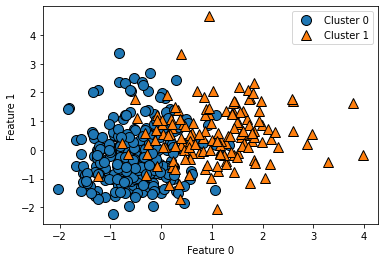

In [34]:
kmeanscancer = KMeans(n_clusters=2)
kmeanscancer.fit(X3_traincancer)
assignmentscancer=kmeanscancer.labels_

mglearn.discrete_scatter(X3_traincancer[:, 0], X3_traincancer[:, 1], assignmentscancer)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## KNN with PCA transformation 

Text(0, 0.5, 'Feature 1')

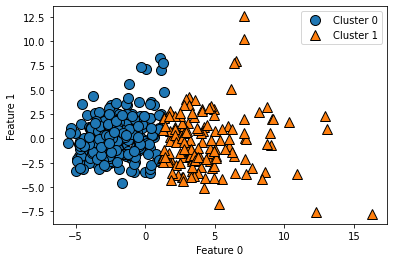

In [35]:
kmeanscancerpca = KMeans(n_clusters=2)
kmeanscancerpca.fit(X3_traincancerpca)
assignmentscancerpca=kmeanscancerpca.labels_

mglearn.discrete_scatter(X3_traincancerpca[:, 0], X3_traincancerpca[:, 1], assignmentscancerpca)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

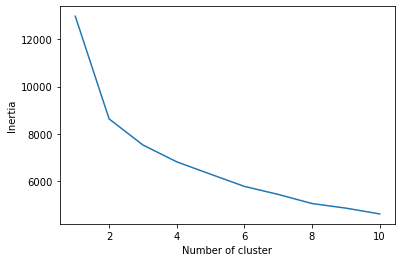

In [36]:
inertiaValscancer = {}

for k in range(1, 11):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X3_traincancerpca)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

## Agglomerative transformation on scaled cancer data set

Text(0, 0.5, 'Feature 1')

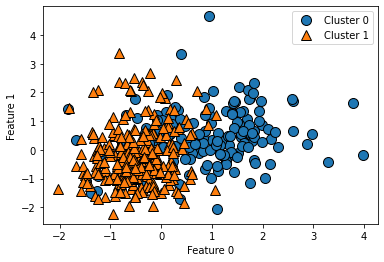

In [37]:
from sklearn.cluster import AgglomerativeClustering

aggcancer = AgglomerativeClustering(n_clusters=2)
assignmentcancer = aggcancer.fit_predict(X3_traincancer)

mglearn.discrete_scatter(X3_traincancer[:, 0], X3_traincancer[:, 1], assignmentcancer)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Agglomerative PCA transformation on cancer data set

Text(0, 0.5, 'Feature 1')

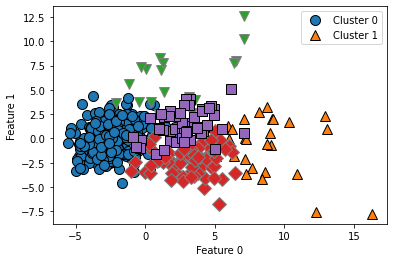

In [38]:
aggcancerpca = AgglomerativeClustering(n_clusters=5)
assignmentcancerpca = aggcancerpca.fit_predict(X3_traincancerpca)

mglearn.discrete_scatter(X3_traincancerpca[:, 0], X3_traincancerpca[:, 1], assignmentcancerpca)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## DBSCAN without PCA transformation on cancer data set:

Text(0.5, 0, 'Feature 0')

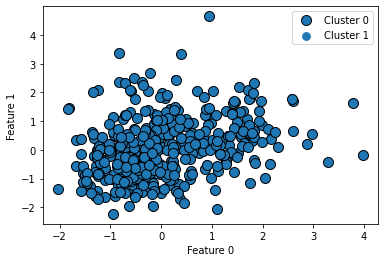

In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.8)
clusters = dbscan.fit_predict(X3_traincancer)

plt.scatter(X3_traincancer[:, 0], X3_traincancer[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X3_traincancer[:, 0], X3_traincancer[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")#plt.ylabel("Feature 1")

## DBSCAN on scaled PCA cancer data set

Text(0.5, 0, 'Feature 0')

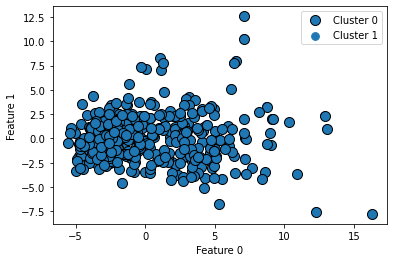

In [40]:
dbscanpca = DBSCAN(min_samples=5,eps=0.95)
clusterspca = dbscanpca.fit_predict(X3_traincancerpca)

plt.scatter(X3_traincancerpca[:, 0], X3_traincancerpca[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X3_traincancerpca[:, 0], X3_traincancerpca[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")#plt.ylabel("Feature 1")

## Calculating ARI without PCA

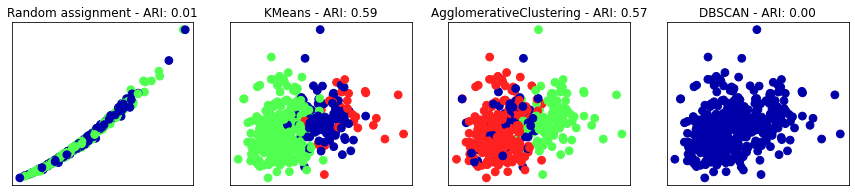

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4),
              DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_traincancer))

axes[0].scatter(X3_traincancer[:, 2], X3_traincancer[:, 3], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_traincancer, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X3_traincancer)
    ax.scatter(X3_traincancer[:, 0], X3_traincancer[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_traincancer, clusters)))

## Calculating ARI with PCA

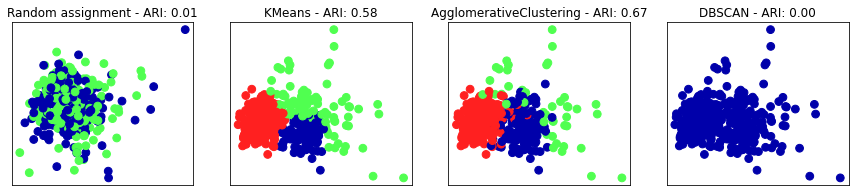

In [42]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_traincancerpca))

# plot random assignment
axes[0].scatter(X3_traincancerpca[:, 2], X3_traincancerpca[:, 3], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y2_traincancerpca, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X3_traincancerpca)
    ax.scatter(X3_traincancerpca[:, 0], X3_traincancerpca[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y2_traincancerpca, clusters)))

## Calculating Silhouette Coefficient without PCA

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

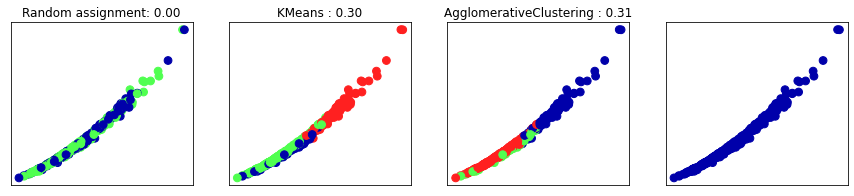

In [43]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_traincancer))

# plot random assignment
axes[0].scatter(X3_traincancer[:, 2], X3_traincancer[:, 3], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X3_traincancer, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X3_traincancer)
    # plot the cluster assignments and cluster centers
    ax.scatter(X3_traincancer[:, 2], X3_traincancer[:, 3], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X3_traincancer, clusters)))

## Calculating Silhouette Coefficient with PCA

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

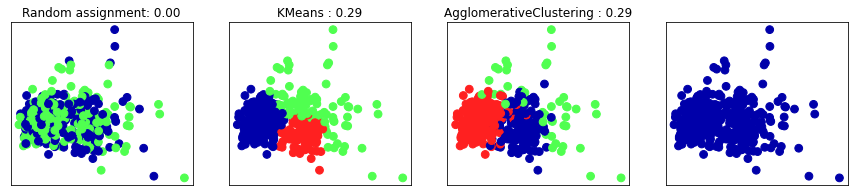

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X3_traincancerpca))

# plot random assignment
axes[0].scatter(X3_traincancerpca[:, 0], X3_traincancerpca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X3_traincancerpca, random_clusters)))

algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X3_traincancerpca)
    # plot the cluster assignments and cluster centers
    ax.scatter(X3_traincancerpca[:, 0], X3_traincancerpca[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X3_traincancerpca, clusters)))